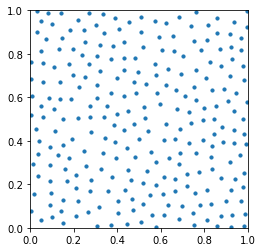

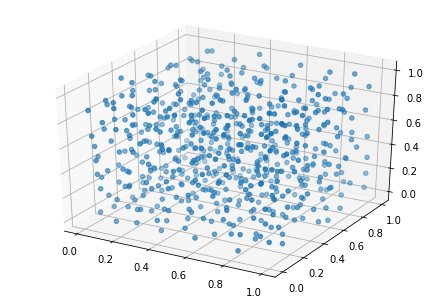

In [1]:
# Poisson disc sampling in arbitrary dimensions
# Implementation by Pavel Zun, pavel.zun@gmail.com
# BSD licence - https://github.com/diregoblin/poisson_disc_sampling

# -----------------------------------------------------------------------------
# Based on 2D sampling by Nicolas P. Rougier - https://github.com/rougier/numpy-book
# -----------------------------------------------------------------------------
import numpy as np
from scipy.special import gammainc

# plotting tools
# %matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Uniform sampling in a hyperspere
# Based on Matlab implementation by Roger Stafford
# Can be optimized for Bridson algorithm by excluding all points within the r/2 sphere 
def hypersphere_sample(center,radius,k=1):
    ndim = center.size
    x = np.random.normal(size=(k, ndim))
    ssq = np.sum(x**2,axis=1)
    fr = radius*gammainc(ndim/2,ssq/2)**(1/ndim)/np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(k,1),(1,ndim))
    p = center + np.multiply(x,frtiled)
    return p

def squared_distance(p0, p1):
    return np.sum((p0-p1)*(p0-p1))

def Bridson_sampling(dims=np.array([1.0,1.0]), radius=0.05, k=30):
    # References: Fast Poisson Disk Sampling in Arbitrary Dimensions
    #             Robert Bridson, SIGGRAPH, 2007

    ndim=dims.size
    
    def in_limits(p):
        return np.all(np.zeros(ndim) <= p) and np.all(p < dims)

    def in_neighborhood(p, n=2):
        indices = (p/cellsize).astype(int)
        indmin = np.maximum(indices-n, np.zeros(ndim, dtype=int))
        indmax = np.minimum(indices+n+1, gridsize)
        if M[tuple(indices)]:
            return True
        for offset in np.ndindex(tuple(indmax - indmin)):
            indcur = tuple([sum(x) for x in zip(indmin,offset)])
            if M[indcur] and squared_distance(p, P[indcur]) < squared_radius:
                return True
        return False

    def add_point(p):
        points.append(p)
        indices = (p/cellsize).astype(int)
        P[tuple(indices)], M[tuple(indices)] = p, True

    cellsize = radius/np.sqrt(ndim)
    gridsize = (np.ceil(dims/cellsize)).astype(int)

    # Squared radius because we'll compare squared distance
    squared_radius = radius*radius

    # Positions cells
    P = np.zeros(np.append(gridsize, ndim), dtype=np.float32) #n-dim value for each grid cell
    M = np.zeros(gridsize, dtype=bool)

    points = []
    add_point(np.random.uniform(np.zeros(ndim), dims))
    while len(points):
        i = np.random.randint(len(points))
        p = points[i]
        del points[i]
        Q = hypersphere_sample(np.array(p), radius*2, k)
        for q in Q:
            if in_limits(q) and not in_neighborhood(q):
                add_point(q)
    return P[M]



if __name__ == '__main__':

    points = Bridson_sampling()
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(points[:,0], points[:,1], s=10)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
        
    points3d = Bridson_sampling(np.array([1.0,1.0,1.0]), radius=0.1, k=30)
    fig3d = plt.figure()
    ax3d = Axes3D(fig3d)
    ax3d.scatter(points3d[:,0], points3d[:,1], points3d[:,2])
    plt.show()   

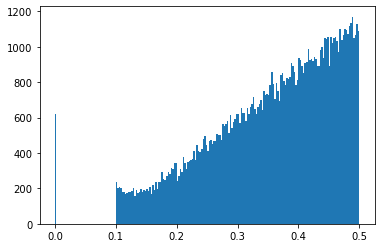

In [2]:
import math
distances = []
for point in points3d:
    for point2 in points3d:
        distances.append(math.sqrt(squared_distance(point, point2)))

# No two points are closer than "radius" to each other        
figDist = plt.figure()
ax = plt.axes()
ax.hist(distances, 200, range=(0,0.5))
plt.show()    

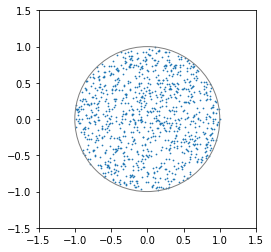

In [3]:
#Hypersphere sampling test

fig1 = plt.figure()
ax1 = fig1.gca()
center = np.array([0,0])
radius = 1
p = hypersphere_sample(center,radius,1000)
ax1.scatter(p[:,0],p[:,1],s=0.5)
ax1.add_artist(plt.Circle(center,radius,fill=False,color='0.5'))
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
ax1.set_aspect('equal')